In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/Datasets

images.csv		      question-3-features-train.csv
question-2-features.csv       question-3-labels-test.csv
question-2-labels.csv	      question-3-labels-train.csv
question-3-features-test.csv


In [ ]:
img_data_ham = pd.read_csv("/content/drive/MyDrive/Datasets/images.csv").to_numpy().astype(float)

In [ ]:
img_data = img_data_ham - np.mean(img_data_ham, axis = 0)

In [ ]:
img_cov = np.cov(img_data, rowvar = False)

In [ ]:
eig_vals, eig_vecs = np.linalg.eigh(img_cov)

In [ ]:
eigs = np.vstack((eig_vals, eig_vecs))
temp = (eig_vals == np.sort(eigs))
np.sum(temp) / temp.shape[0]

0.9995661605206074

In [ ]:
desc_eigs = eigs[:, ::-1]
desc_eig_vals = eig_vals[::-1]
desc_eig_vecs = eig_vecs[:, ::-1]

In [ ]:
i = 1
while i < 11:
    print(f"Proportional variance of PC%d is %.3f" % (i, desc_eig_vals[i-1] / np.sum(eig_vals)))
    i += 1

Proportional variance of PC1 is 0.283
Proportional variance of PC2 is 0.110
Proportional variance of PC3 is 0.098
Proportional variance of PC4 is 0.061
Proportional variance of PC5 is 0.032
Proportional variance of PC6 is 0.029
Proportional variance of PC7 is 0.021
Proportional variance of PC8 is 0.021
Proportional variance of PC9 is 0.018
Proportional variance of PC10 is 0.014


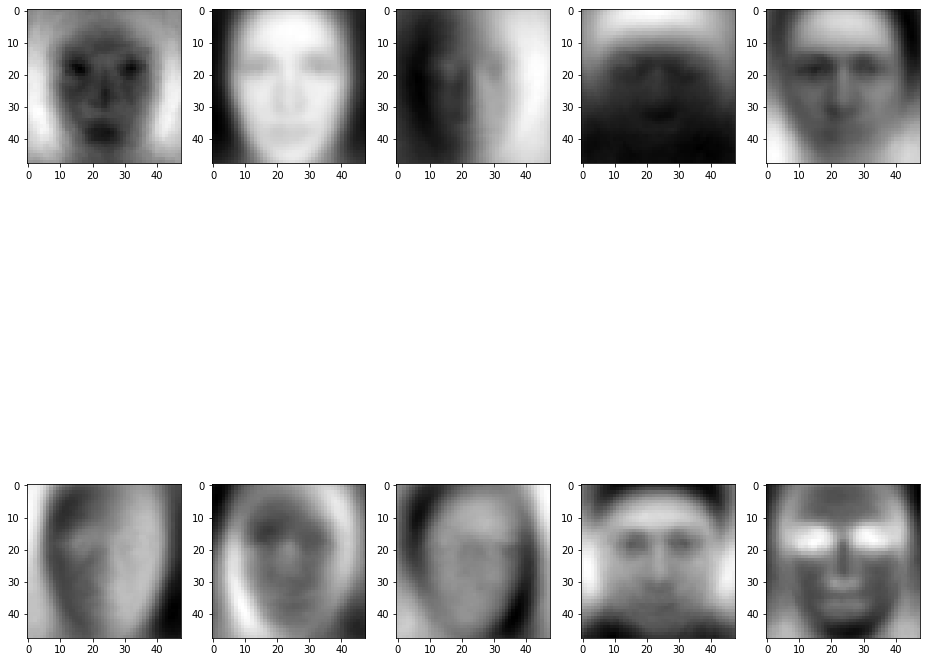

In [ ]:
PCs = eig_vals[:10]

img_48 = desc_eig_vecs.transpose().reshape(-1, 48, 48)
axis = plt.figure(figsize = (16, 16))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(img_48[i], cmap = 'gray')

When k=1 PVE is 28.334
When k=10 PVE is 68.708
When k=50 PVE is 85.693
When k=100 PVE is 90.844
When k=500 PVE is 98.065



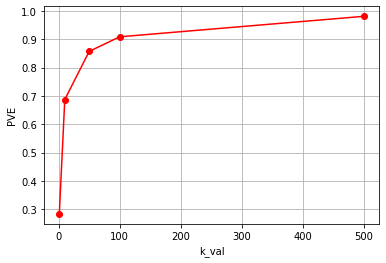

In [ ]:
k_vals = (1, 10, 50, 100, 500)
PVEs = np.zeros(5)

for i in range(5):
    PVEs[i] = np.sum(desc_eig_vals[:k_vals[i]] / np.sum(eig_vals))
    print("When k=%d PVE is %.3f"%(k_vals[i], 100*PVEs[i]))

print()
plt.plot(k_vals, PVEs, 'ro-')
plt.grid()
plt.xlabel('k_val')
plt.ylabel('PVE')
plt.show()

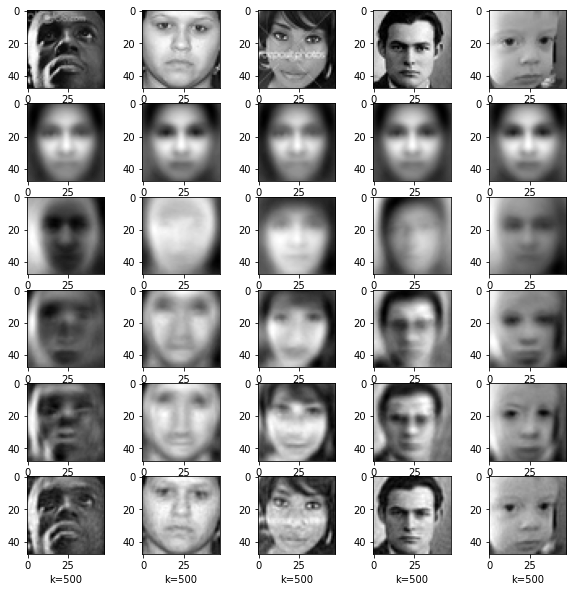

In [ ]:
def reconstructor(eigen_vector, data):
    temp = np.matmul(data[:5], eigen_vector)
    recons_img = np.matmul(temp, eigen_vector.T) + np.mean(img_data_ham, axis = 0)
    return recons_img

plot = plt.figure(figsize = (10, 10))

for i in range(5):
    plt.subplot(6, 5, i+1)
    plt.imshow(img_data_ham[i].reshape(48, 48), cmap = 'gray')

q = 1
for i in k_vals:
    img = reconstructor(desc_eig_vecs[:, :i], img_data)
    for k in range(5):
        plt.subplot(6, 5, q+5)
        plt.xlabel(f"k={i}")
        plt.imshow(img[k].reshape(48, 48), cmap = 'gray')
        q += 1